## This is the DecisionTree jupyternote book ***following the webbinar of  Decision Trees in Python from Start to Finish of Statquest Josh Stamer**
1. Imported Data
2. Dealing with missing data
3. Format the data using One-hot Encoding
4. Built a preliminary Decision Tree for Classification
5. Pruned the Decision Tree with Cost Complexity Pruning
6. Built, Drew, Interpreted and Evaluated the Final Decision Tree

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [4]:
df = pd.read_csv('processed.cleveland.data',header=None)

In [5]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [9]:
df.columns = ["age", #age in years
                    "sex", #(1 = male; 0 = female)
                    "cp", # cp: chest pain type
                            #-- Value 1: typical angina
                            #-- Value 2: atypical angina
                            #-- Value 3: non-anginal pain
                            #-- Value 4: asymptomatic
                    "trestbps", # resting blood pressure (in mm Hg on admission to the hospital)
                    "chol", #serum cholestoral in mg/dl
                    "fbs", #(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
                    "restecg", 
                    #(fasting  restecg: resting electrocardiographic results
                    # -- Value 0: normal
                    #-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
                    #-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteriablood sugar > 120 mg/dl) (1 = true; 0 = false)
                    "thalach", # maximum heart rate achieved
                    "exang", # exercise induced angina (1 = yes; 0 = no)
                    "oldpeak",# ST depression induced by exercise relative to rest
                    "slope", # the slope of the peak exercise ST segment
                    #-- Value 1: upsloping
                    #-- Value 2: flat
                    #-- Value 3: downsloping
                    "ca", #  number of major vessels (0-3) colored by flourosopy
                    "thal", # 3 = normal; 6 = fixed defect; 7 = reversable defect
                    "hd"]

In [10]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [12]:
df.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
hd            int64
dtype: object

In [13]:
#object dataset has complicated inside it (number, letter)
df['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [14]:
df['thal'].unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

In [16]:
#count the number of row with ? as a value
len(df.loc[(df['ca']== "?")
|
(df['thal'] == '?')])

6

In [18]:
df.loc[(df['ca']== "?")
|
(df['thal'] == '?')]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [19]:
len(df)

303

In [22]:
df_no_missing = df.loc[(df['ca']!= "?")
&
(df['thal'] != '?')]

In [24]:
len(df_no_missing)

297

In [26]:
df_no_missing['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0'], dtype=object)

In [27]:
df_no_missing['thal'].unique()

array(['6.0', '3.0', '7.0'], dtype=object)

## Format data: split data into 2 part

In [29]:
X = df_no_missing.drop('hd', axis=1).copy()
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


In [32]:
y = df_no_missing['hd'].copy()
y.head()

0    0
1    2
2    1
3    0
4    0
Name: hd, dtype: int64

### **One-Hot Encoding**

In [33]:
X.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
dtype: object

While Scikit-learn Decision trees support continous data (i.e: blood pressure (restbp) and maximum heart rate (thalach)), they do not natively supports categorical data (i.e chest pain (cp) which contains 4 different categories)
Thus using the trick that converts a column of catergorical data into multiple columns of binary values.-> **One-hot encoding**

In [34]:
X['cp'].unique()

array([1., 4., 3., 2.])

In [35]:
pd.get_dummies(X, columns=['cp']).head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,cp_1.0,cp_2.0,cp_3.0,cp_4.0
0,63.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,1,0,0,0
1,67.0,1.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,0,0,0,1
2,67.0,1.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,1,0
4,41.0,0.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,1,0,0


In [36]:
X_encoded = pd.get_dummies(X, columns=[
    'cp',
    'restecg',
    'slope',
    'thal'
])

In [38]:
X_encoded.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,cp_1.0,...,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,1,...,0,0,0,1,0,0,1,0,1,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,0,...,1,0,0,1,0,1,0,1,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,0,...,1,0,0,1,0,1,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,...,0,1,0,0,0,0,1,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,...,0,0,0,1,1,0,0,1,0,0


In [39]:
y.unique()

array([0, 2, 1, 3, 4])

In [40]:
y_not_zero_index = y > 0
y[y_not_zero_index] = 1
y.unique()

array([0, 1])

## **Build a preliminary Classification Tree**

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state= 42)

clf_df = DecisionTreeClassifier(random_state=42)
clf_df = clf_df.fit(X_train, y_train)

[Text(479.8318965517241, 390.7125, 'ca <= 0.5\ngini = 0.498\nsamples = 222\nvalue = [118, 104]\nclass = No HD'),
 Text(277.79741379310343, 356.73749999999995, 'thal_7.0 <= 0.5\ngini = 0.382\nsamples = 132\nvalue = [98, 34]\nclass = No HD'),
 Text(169.5646551724138, 322.7625, 'oldpeak <= 2.7\ngini = 0.24\nsamples = 93\nvalue = [80, 13]\nclass = No HD'),
 Text(122.66379310344828, 288.78749999999997, 'age <= 58.5\ngini = 0.185\nsamples = 87\nvalue = [78, 9]\nclass = No HD'),
 Text(72.15517241379311, 254.81249999999997, 'chol <= 311.5\ngini = 0.061\nsamples = 63\nvalue = [61, 2]\nclass = No HD'),
 Text(43.293103448275865, 220.83749999999998, 'trestbps <= 109.0\ngini = 0.033\nsamples = 60\nvalue = [59, 1]\nclass = No HD'),
 Text(28.862068965517242, 186.86249999999998, 'sex <= 0.5\ngini = 0.278\nsamples = 6\nvalue = [5, 1]\nclass = No HD'),
 Text(14.431034482758621, 152.8875, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]\nclass = No HD'),
 Text(43.293103448275865, 152.8875, 'exang <= 0.5\ngini = 

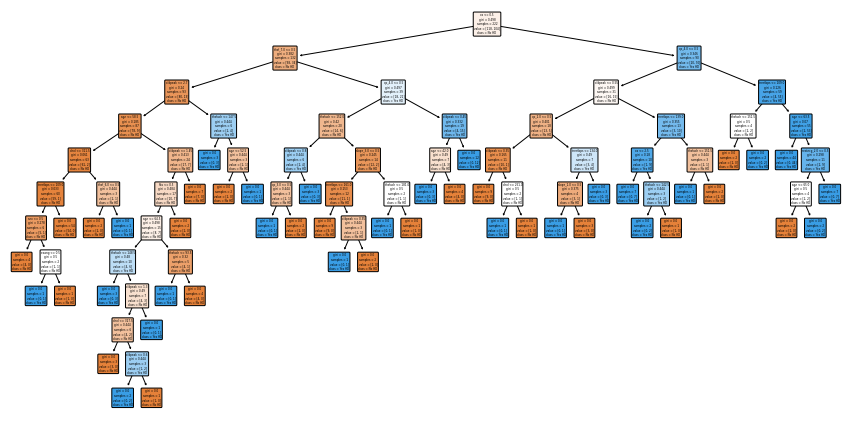

In [43]:
plt.figure(figsize=(15, 7.5))
plot_tree(clf_df,
        filled = True, 
        rounded = True, 
        class_names = ["No HD", "Yes HD"],
        feature_names = X_encoded.columns)

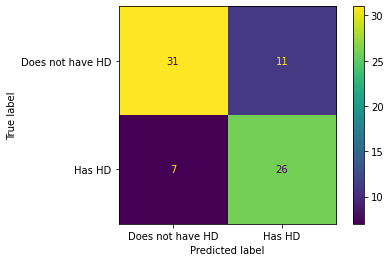

In [44]:
plot_confusion_matrix(clf_df, X_test, y_test, display_labels=["Does not have HD", "Has HD"])

## **Cost complexity pruining: Visualize alpha**

In [49]:
path = clf_df.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
ccp_alphas = ccp_alphas[:-1]
clf_dfs  = []
for ccp_alpha in ccp_alphas:
    clf_df = DecisionTreeClassifier(random_state= 0, ccp_alpha =ccp_alpha)
    clf_df.fit(X_train, y_train)
    clf_dfs.append(clf_df)

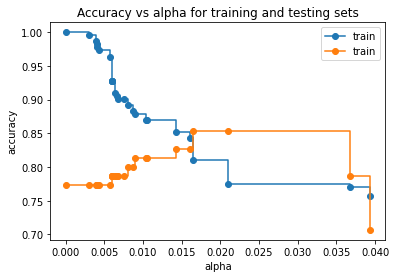

In [52]:
train_scores = [clf_df.score(X_train, y_train) for clf_df in clf_dfs]
test_scores = [clf_df.score(X_test, y_test) for clf_df in clf_dfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker = 'o', label = 'train', drawstyle = 'steps-post')
ax.plot(ccp_alphas, test_scores, marker = 'o', label = 'train', drawstyle = 'steps-post')
ax.legend()
plt.show()

### **Cross Validation for finding the best alpha**

<AxesSubplot:xlabel='tree'>

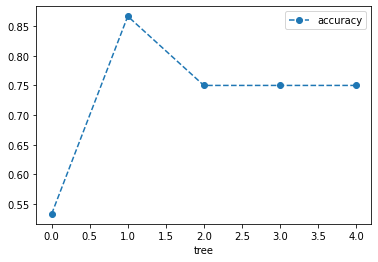

In [54]:
clf_df = DecisionTreeClassifier(random_state= 0, ccp_alpha = 0.016)

scores = cross_val_score(clf_df, X_train, y_train, cv = 5)
df = pd.DataFrame(data = {'tree': range(5), 'accuracy': scores})
df.plot(x = 'tree', y = 'accuracy', marker = 'o', linestyle = '--')

<AxesSubplot:xlabel='alpha'>

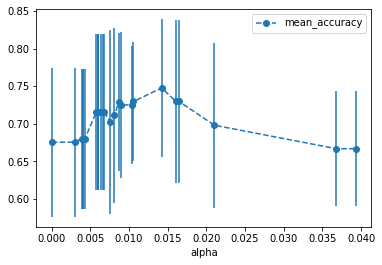

In [55]:
alpha_loop_values = []

for ccp_alpha in ccp_alphas:
    clf_df = DecisionTreeClassifier(random_state= 0, ccp_alpha = ccp_alpha)
    scores = cross_val_score(clf_df, X_train, y_train, cv = 5)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])

alpha_results = pd.DataFrame(alpha_loop_values, columns=['alpha', 'mean_accuracy', 'std'])

alpha_results.plot(
                x = 'alpha',
                y = 'mean_accuracy',
                yerr = 'std',
                marker = 'o',
                linestyle = '--'
)

In [57]:
alpha_results[(alpha_results['alpha'] > 0.014)
            &
            (alpha_results['alpha'] < 0.015)]

,alpha,mean_accuracy,std
20,0.014225,0.747778,0.091395


In [58]:
ideal_ccp_alpha = alpha_results[(alpha_results['alpha'] > 0.014)
            &
            (alpha_results['alpha'] < 0.015)]['alpha']

In [60]:
ideal_ccp_alpha = float(ideal_ccp_alpha)
ideal_ccp_alpha

0.014224751066856332

In [63]:
clf_df_pruned = DecisionTreeClassifier(random_state=42, ccp_alpha = ideal_ccp_alpha)
clf_df_pruned  = clf_df_pruned.fit(X_train, y_train)

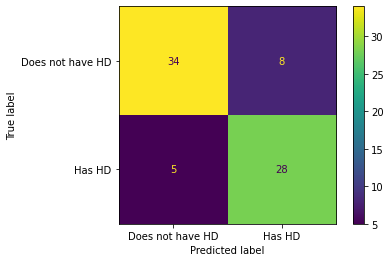

In [64]:
plot_confusion_matrix(clf_df_pruned,
                    X_test,
                    y_test,
                    display_labels = ['Does not have HD', 'Has HD'])

[Text(482.8846153846154, 356.7375, 'ca <= 0.5\ngini = 0.498\nsamples = 222\nvalue = [118, 104]\nclass = No HD'),
 Text(257.53846153846155, 254.8125, 'thal_7.0 <= 0.5\ngini = 0.382\nsamples = 132\nvalue = [98, 34]\nclass = No HD'),
 Text(128.76923076923077, 152.8875, 'oldpeak <= 2.7\ngini = 0.24\nsamples = 93\nvalue = [80, 13]\nclass = No HD'),
 Text(64.38461538461539, 50.96249999999998, 'gini = 0.185\nsamples = 87\nvalue = [78, 9]\nclass = No HD'),
 Text(193.15384615384616, 50.96249999999998, 'gini = 0.444\nsamples = 6\nvalue = [2, 4]\nclass = Yes HD'),
 Text(386.3076923076923, 152.8875, 'cp_4.0 <= 0.5\ngini = 0.497\nsamples = 39\nvalue = [18, 21]\nclass = Yes HD'),
 Text(321.9230769230769, 50.96249999999998, 'gini = 0.42\nsamples = 20\nvalue = [14, 6]\nclass = No HD'),
 Text(450.69230769230774, 50.96249999999998, 'gini = 0.332\nsamples = 19\nvalue = [4, 15]\nclass = Yes HD'),
 Text(708.2307692307693, 254.8125, 'cp_4.0 <= 0.5\ngini = 0.346\nsamples = 90\nvalue = [20, 70]\nclass = Yes H

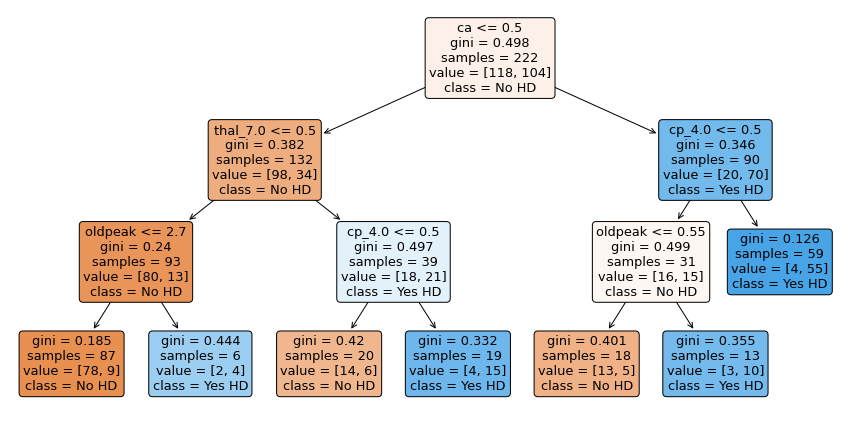

In [65]:
plt.figure(figsize=(15, 7.5))
plot_tree(clf_df_pruned,
        filled = True, 
        rounded = True, 
        class_names = ["No HD", "Yes HD"],
        feature_names = X_encoded.columns)